# 2 . Utilizando a base disponível no ​ [link](https://archive.ics.uci.edu/ml/datasets/Avila), crie os datasets a seguir:

|Dataset| % de instâncias|
|-|-|
|Treino| 60%|
|Validação| 20%|
|Teste| 20%|


Elabore uma rede neural de duas camadas para classificação do banco de
dados.
Ao fim do treinamento, avalie o desempenho da rede utilizando a matriz de
confusão com o dataset de teste e mostre o valor de acurácia.
Observações:

● Utilize apenas o arquivo ​ avila-tr.txt​ .

● A camada de saída da rede deverá conter um neurônio para cada classe.

● Utilize o dataset de validação para criar algum critério de parada no
treinamento.

Bônus: defina uma arquitetura de rede neural ou modelos de ​ deep learning que
ultrapassem 75% de acurácia.

### DATA SET DESCRIPTION 
The Avila data set has been extracted from 800 images of the the "Avila Bible", a giant Latin copy of the whole Bible produced during the XII century between Italy and Spain.  
The palaeographic analysis of the  manuscript has  individuated the presence of 12 copyists. The pages written by each copyist are not equally numerous. 
Each pattern contains 10 features and corresponds to a group of 4 consecutive rows.

The prediction task consists in associating each pattern to one of the 12 copyists (labeled as: A, B, C, D, E, F, G, H, I, W, X, Y).
The data have has been normalized, by using the Z-normalization method, and divided in two data sets: a training set containing 10430 samples, and a test set  containing the 10437 samples.

### Class distribution (training set)
* A: 4286
* B: 5  
* C: 103 
* D: 352 
* E: 1095 
* F: 1961 
* G: 446 
* H: 519
* I: 831
* W: 44
* X: 522 
* Y: 266

### ATTRIBUTE DESCRIPTION
|ID|      Name    |
|-|-|
|F1|       intercolumnar distance |
|F2|       upper margin |
|F3|       lower margin |
|F4|       exploitation |
|F5|       row number |
|F6|      modular ratio |
|F7|       interlinear spacing |
|F8|       weight |
|F9|       peak number |
|F10|     modular ratio/ interlinear spacing|
Class: A, B, C, D, E, F, G, H, I, W, X, Y


CITATIONS
If you want to refer to the Avila data set in a publication, please cite the following paper:

C. De Stefano, M. Maniaci, F. Fontanella, A. Scotto di Freca,
Reliable writer identification in medieval manuscripts through page layout features: The "Avila" Bible case, Engineering Applications of Artificial Intelligence, Volume 72, 2018, pp. 99-110.


In [1]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np

In [3]:
import pandas as pd

In [4]:
dataset = pd.read_csv('./avila/avila-tr.txt', header = None)

In [5]:
dataset.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


In [6]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9
count,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000
mean,0.000852,0.033611,-0.000525,-0.002387,0.006370,0.013973,0.005605,0.010323,0.012914,0.000818
std,0.991431,3.920868,1.120202,1.008527,0.992053,1.126245,1.313754,1.003507,1.087665,1.007094
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.541992,-0.372457,-0.516097
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111803,0.064084,-0.034513
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654944,0.500624,0.530855
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,4.671232


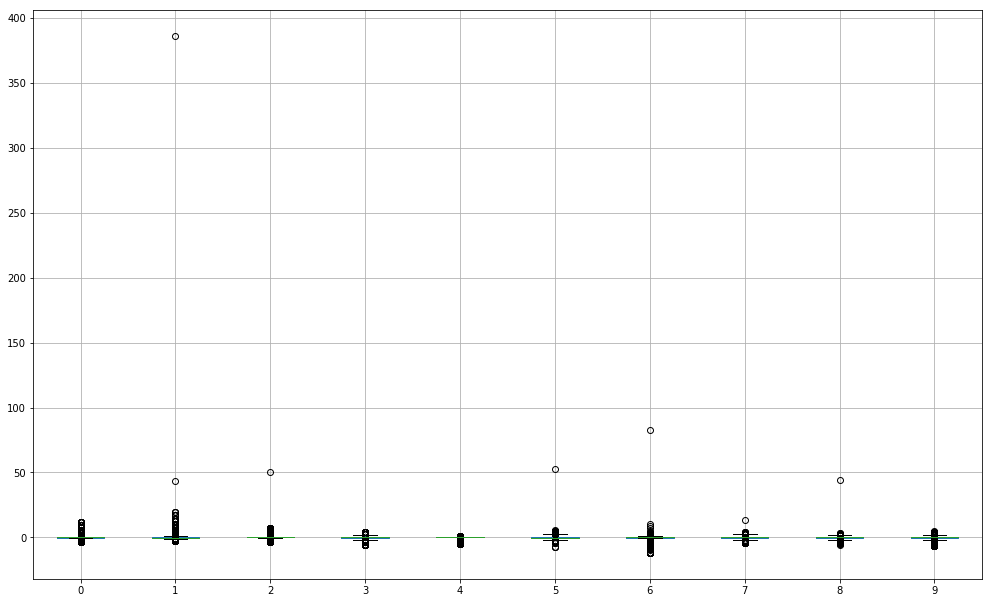

In [7]:
# Aumentar o tamanho do plot na proporção 8/13
x_size = 17
y_size = x_size * (8/13)
plt.figure(figsize=(x_size, y_size))
# Aumentar o tamanho do plot na proporção 8/13

dataset.boxplot()

# Percebendo o _outlier_ na coluna 1

In [8]:
a = dataset.loc[dataset[1] == 386]

In [9]:
a

,0,1,2,3,4,5,6,7,8,9,10
6619,0.0,386.0,50.0,0.168104,0.0,53.0,83.0,0.275032,44.0,0.63802,A


In [10]:
aux = np.array(dataset[1])
dataset[1] = dataset[1].replace(386, np.nanmedian(aux))

In [11]:
dataset.loc[dataset[1] == 386]

,0,1,2,3,4,5,6,7,8,9,10


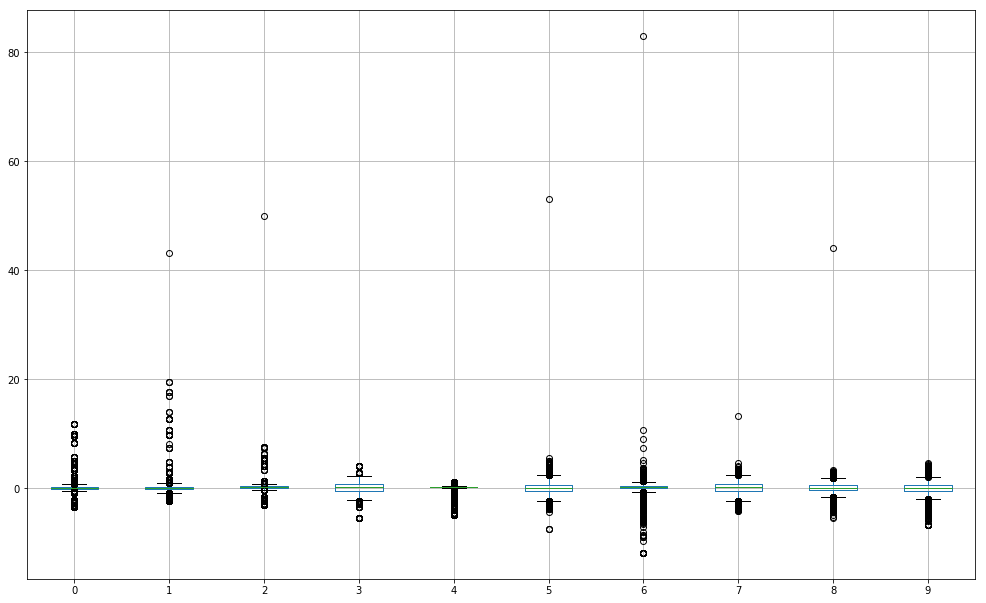

In [12]:
# Aumentar o tamanho do plot na proporção 8/13
x_size = 17
y_size = x_size * (8/13)
plt.figure(figsize=(x_size, y_size))
# Aumentar o tamanho do plot na proporção 8/13
dataset.boxplot()

In [13]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9
count,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000
mean,0.000852,-0.003403,-0.000525,-0.002387,0.006370,0.013973,0.005605,0.010323,0.012914,0.000818
std,0.991431,1.042894,1.120202,1.008527,0.992053,1.126245,1.313754,1.003507,1.087665,1.007094
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.541992,-0.372457,-0.516097
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111803,0.064084,-0.034513
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654944,0.500624,0.530855
max,11.819916,43.133656,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,4.671232


In [14]:
b = np.array(dataset[6])

In [15]:
b


array([ 0.371178,  1.46594 , -0.081827, ...,  0.295677,  0.069175,
        0.786433])

In [16]:
np.max(b)

83.0

In [17]:
for i in [1, 2, 5, 6, 7, 8]:
    aux = np.array(dataset[i])
    dataset[i] = dataset[i].replace(np.max(aux), np.nanmedian(aux))

In [18]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9
count,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000
mean,0.000852,-0.007544,-0.005298,-0.002387,0.006370,0.008886,-0.002331,0.009070,0.008702,0.000818
std,0.991431,0.953512,1.007528,1.008527,0.992053,0.999600,1.032191,0.995195,0.998735,1.007094
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.541992,-0.372457,-0.516097
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111778,0.064084,-0.034513
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654886,0.500624,0.530855
max,11.819916,19.470188,7.458681,3.987152,1.066121,5.505495,10.714792,4.510897,3.244594,4.671232


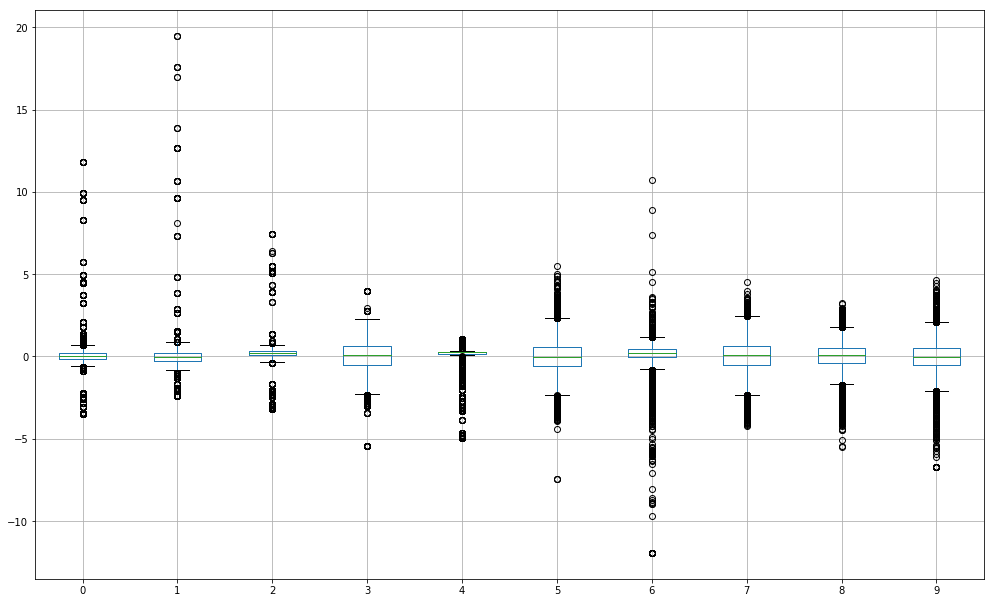

In [19]:
# Aumentar o tamanho do plot na proporção 8/13
x_size = 17
y_size = x_size * (8/13)
plt.figure(figsize=(x_size, y_size))
# Aumentar o tamanho do plot na proporção 8/13
dataset.boxplot()

# Mudando a classe de caractere para inteiro

In [20]:
dictionary_classes = {}

In [21]:
ord("A")

65

In [22]:
classes_number = [i for i in range(12)]

In [23]:
classes_number

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [24]:
classes_charcteres = ["A","B","C","D","E","F","G","H","I","W","X","Y"]

In [25]:
for num, char in zip(classes_number, classes_charcteres):
    dictionary_classes[char] = num

In [26]:
dictionary_classes

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'W': 9,
 'X': 10,
 'Y': 11}

In [27]:
dataset[10].head(5)

0    A
1    A
2    A
3    A
4    F
Name: 10, dtype: object

In [28]:
for key in dictionary_classes:
    print(key, dictionary_classes[key])
    dataset[10] = dataset[10].replace(key, dictionary_classes[key])

A 0
B 1
C 2
D 3
E 4
F 5
G 6
H 7
I 8
W 9
X 10
Y 11


Testando se realmente funcionou

In [29]:
dataset[10].head()

0    0
1    0
2    0
3    0
4    5
Name: 10, dtype: int64

In [30]:
dataset[10].tail()

10425     5
10426     5
10427     0
10428     4
10429    10
Name: 10, dtype: int64

# Analise inicial de correlação

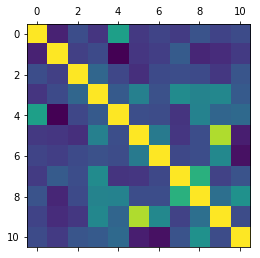

In [31]:
plt.matshow(dataset.corr())

Percebemos que os atributos 5('row number') e 9(peak number) possuem alta correlação

In [32]:
dataset[9].corr(dataset[5])

0.8485534155934017

?dataset.plot('hist')


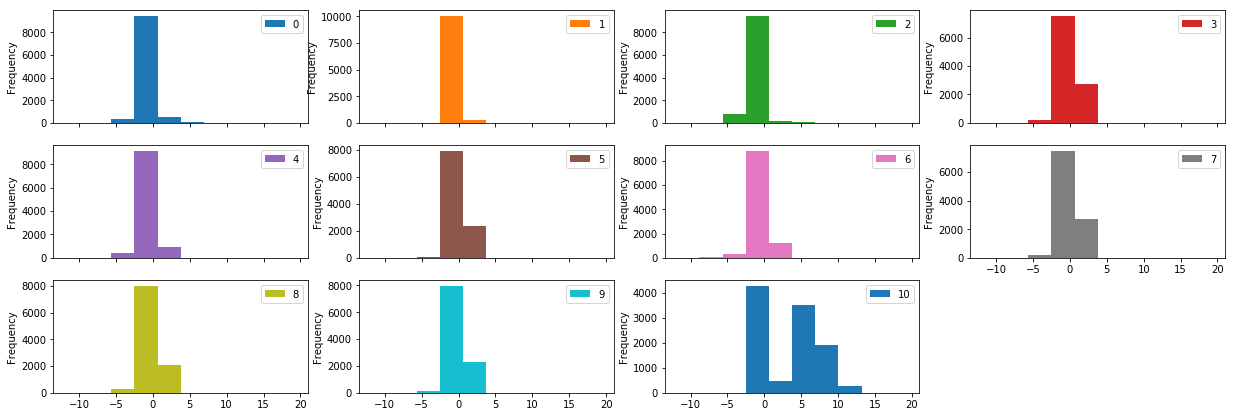

In [35]:
a = dataset.plot(kind='hist', subplots=True, figsize=(21,12), layout=(5,4))

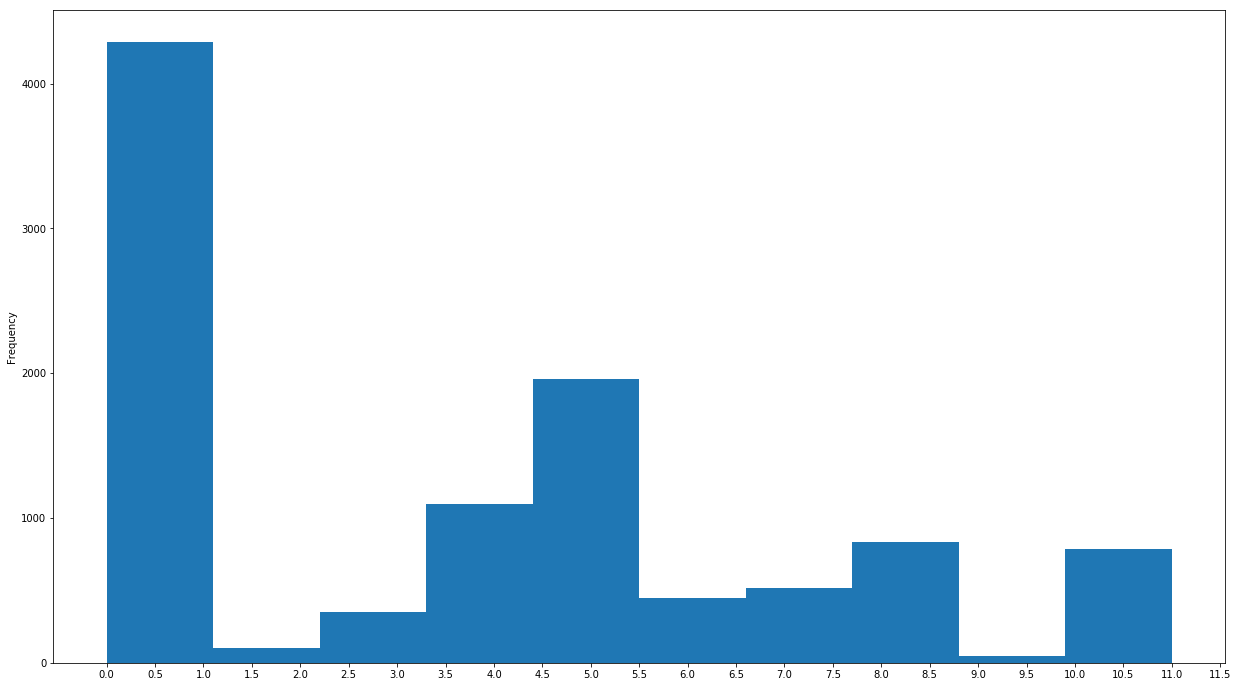

In [36]:
dataset[10].plot(kind='hist',figsize=(21,12), xticks=[i/2 for i in range(24)])

# Normalizar os atributos

In [37]:
for i in dataset.columns:
    print(i)

0
1
2
3
4
5
6
7
8
9
10


In [38]:
for i in [0,1,2,3,4,5,6,7,8,9]:
    df = dataset[i].values

In [39]:
from sklearn import preprocessing

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 10].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
df = pd.DataFrame(x_scaled)

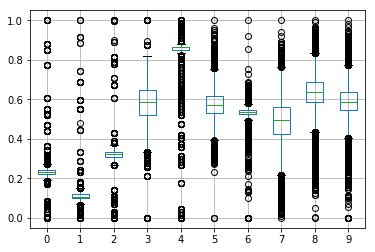

In [40]:
df.boxplot()

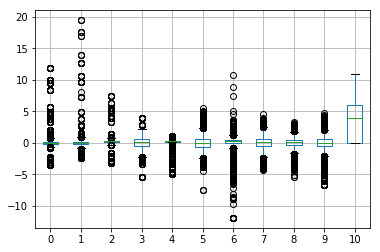

In [41]:
dataset.boxplot()

# Diminuir a classe A do sistema

Devido a um desbalanceamento das classes é necessário remover algumas instancias de A

In [108]:
#print("Removendo instancias de A devido a alta quantidade")
#confirmação = input("Realmente deseja fazer isso?[Y/N]")

#if confirmação == 'Y':
#for i in range(3000):
dataset[dataset[10] == 0]
a = dataset.loc[dataset[10] == 0].index

In [109]:
type(a)

pandas.core.indexes.numeric.Int64Index

In [110]:
a.drop(a[4285])

Int64Index([    0,     1,     2,     3,     5,     6,    10,    13,    16,
               19,
            ...
            10407, 10410, 10414, 10415, 10416, 10417, 10419, 10420, 10421,
            10424],
           dtype='int64', length=4285)

In [138]:
import random
from datetime import datetime
random.seed(datetime.now())
df = dataset
for _ in range(1000):
    try:
        b = random.randint(1,len(a))
        df = df.drop(a[b])
    except Exception as e:
        pass
        #print(b, a[b])

In [139]:
df.head(a[b]+4).tail(7)

,0,1,2,3,4,5,6,7,8,9,10
8610,-0.585651,-0.354049,-3.210528,0.356517,0.261718,1.436060,0.333428,0.192018,0.937165,1.221860,4
8611,0.093260,0.101320,0.313868,0.756586,0.351096,-0.100360,0.257927,1.434681,0.438262,-0.105964,0
8612,-0.437525,-0.471816,0.463236,-0.545248,0.261718,1.186911,0.786433,-1.189738,-0.216549,0.735183,4
8613,0.043885,0.407516,0.047137,0.460921,0.261718,-0.474083,-0.232828,0.800555,-0.091823,-0.187179,5
8614,-0.437525,-0.471816,0.463236,-0.545248,0.261718,1.643684,-0.044076,-1.506559,-0.777816,1.689768,4
8615,0.229043,0.242641,0.089814,0.120230,0.261718,-0.764757,0.484429,0.865615,0.219991,-0.807476,0
8616,0.438888,-0.047852,0.388552,0.873551,-1.078955,1.560634,0.182426,0.069196,-0.372457,1.598656,0


In [140]:
df.head(8277+4).tail(7)

,0,1,2,3,4,5,6,7,8,9,10
9795,0.636390,-0.063555,0.132491,-0.631719,0.976743,-0.307984,0.295677,-1.313084,0.126447,-0.319689,8
9797,-0.116585,-0.581733,0.569929,1.083313,0.082961,-0.764757,-0.346080,1.443418,0.469443,-0.393250,3
9799,0.105604,-0.377602,0.260522,0.107578,0.261718,0.273364,0.220177,-0.193378,-0.653090,0.257992,5
9800,0.846235,-0.094960,0.182281,-1.981085,0.619230,-2.882524,-1.252090,0.088844,2.496239,-2.024791,8
9802,-0.635027,-0.448263,0.299642,1.407861,0.172340,0.896237,-1.931597,0.527768,2.059698,2.434161,11
9803,9.943651,-0.220579,-0.048886,-0.675372,-3.045274,3.719926,2.371950,-2.598171,-2.898156,1.370295,8
9804,0.019197,0.093469,0.473906,1.897295,0.172340,1.768258,0.446679,0.430225,1.217798,1.448340,10


In [141]:
dataset.drop(0).head(2)

,0,1,2,3,4,5,6,7,8,9,10
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,0
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,0


In [142]:
dataset.head(2)

,0,1,2,3,4,5,6,7,8,9,10
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,0
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,0


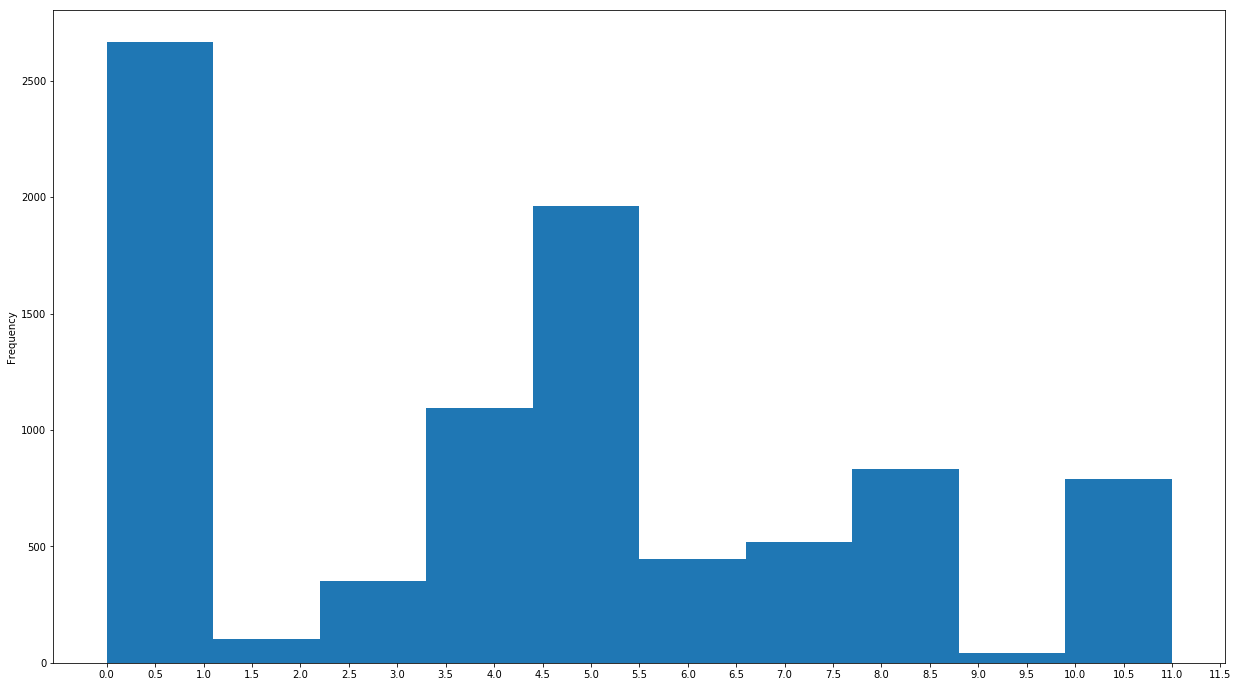

In [143]:
df[10].plot(kind='hist',figsize=(21,12), xticks=[i/2 for i in range(24)])

(array([2669.,  103.,  352., 1095., 1961.,  446.,  519.,  831.,   44.,
         788.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

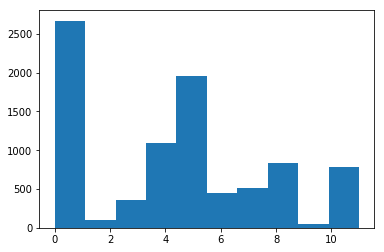

In [144]:
plt.hist(df[10].values)

In [145]:
import collections
collections.Counter(df[10].values)

Counter({0: 2664,
         5: 1961,
         7: 519,
         4: 1095,
         8: 831,
         11: 266,
         3: 352,
         10: 522,
         6: 446,
         9: 44,
         2: 103,
         1: 5})

In [159]:
if input() == 'y':
    dataset = df
    X = dataset.iloc[:, :-1].values
    y = dataset.iloc[:, 10].values

y


In [147]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000,8808.000000
mean,0.008033,-0.010360,0.009928,-0.004663,0.040201,-0.023792,-0.022448,0.009812,0.063635,-0.003501,4.195163
std,1.006280,0.928650,0.982790,1.007727,0.959691,1.004302,1.021489,1.009266,1.019839,1.004316,3.331288
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324,0.000000
25%,-0.153617,-0.267686,0.072032,-0.543548,0.172340,-0.681707,-0.081827,-0.539899,-0.310094,-0.544744,0.000000
50%,0.031541,-0.063555,0.228514,0.082634,0.261718,-0.100360,0.182426,0.117482,0.095265,-0.059889,5.000000
75%,0.192011,0.203385,0.356544,0.655644,0.261718,0.522513,0.446679,0.658298,0.594169,0.526846,6.000000
max,11.819916,19.470188,7.458681,3.987152,1.066121,5.505495,10.714792,4.510897,3.244594,4.671232,11.000000


In [160]:
import collections
collections.Counter(dataset[10].values)

Counter({0: 2664,
         5: 1961,
         7: 519,
         4: 1095,
         8: 831,
         11: 266,
         3: 352,
         10: 522,
         6: 446,
         9: 44,
         2: 103,
         1: 5})

# Criando fake data para a classe B

In [166]:
dataset[10].describe()

count    8808.000000
mean        4.195163
std         3.331288
min         0.000000
25%         0.000000
50%         5.000000
75%         6.000000
max        11.000000
Name: 10, dtype: float64

In [183]:
# Docstring:
# Return random integer in range [a, b], including both end points.
df = dataset
# array com indices de B
a = dataset.loc[dataset[10] == 1].index
a

Int64Index([708, 4639, 7119, 7740, 9457], dtype='int64')

In [223]:
for i in range(10):
    random.seed(datetime.now())
    parametro_alterado = random.randint(0,9)
    linha_alterada = random.randint(0,len(a)-1)
    valor_a_ser_alterado = (random.random())/10
    soma_ou_diminui = random.randint(0,1)
    
    print(parametro_alterado, linha_alterada, valor_a_ser_alterado, soma_ou_diminui)
    print(df[parametro_alterado][a[linha_alterada]])
    print(valor_a_ser_alterado + df[parametro_alterado][a[linha_alterada]])
    print(df[linha_alterada-1:linha_alterada])
    print(12*"#")
    
    
    
    if soma_ou_diminui == 1:
        pass
        #soma
        #df.append(pd.DataFrame(valor_a_ser_alterado + df[parametro_alterado][a[linha_alterada]]))
    
    #else:
    #    df = df.append(-valor_a_ser_alterado + df[parametro_alterado][a[linha_alterada]])
    
    #a = df.loc[dataset[10] == 1].index

1 2 0.018623679306117025 1
12.655362
12.673985679306117
         0         1         2         3         4        5         6   \
4  0.229043  0.807926 -0.052442  0.082634  0.261718  0.14879  0.635431   

         7         8         9   10  
4  0.051062  0.032902 -0.086652   5  
############
7 2 0.0909905188239167 1
0.994767
1.0857575188239166
         0         1         2         3         4        5         6   \
4  0.229043  0.807926 -0.052442  0.082634  0.261718  0.14879  0.635431   

         7         8         9   10  
4  0.051062  0.032902 -0.086652   5  
############
8 4 0.06130987153144367 1
-0.0982382532685174
-0.03692838173707373
         0         1         2         3         4         5         6   \
7  0.019197 -0.040001  0.288973 -0.042597  0.261718 -1.013906  0.069175   

         7         8         9   10  
7  0.890701  0.095265 -0.842014   5  
############
9 3 0.09478828342195408 1
1.8473169999999999
1.9421052834219539
         0         1         2         3    

,0,1,2,3,4,5,6,7,8,9,10
17,-0.301743,-0.314793,0.399221,0.770520,0.708609,0.564038,-1.327590,0.004193,0.750076,1.649058,11
18,-0.091897,0.297600,0.079145,0.196496,0.261718,-0.183409,0.220177,0.305093,-0.278912,-0.163443,5
19,-0.091897,-0.220579,0.274747,0.567174,-0.185173,0.730137,0.031425,-0.396638,-0.403638,0.770625,0
20,-0.005490,0.478177,0.029355,-0.247644,0.172340,1.062336,0.333428,-0.670454,0.095265,0.902376,0
21,0.438888,0.195534,0.143160,-0.809435,0.261718,-1.138481,-0.232828,-0.087894,-0.278912,-0.802015,5
23,-0.054866,-0.220579,0.466793,-0.216970,0.172340,-0.930856,0.446679,0.634922,0.313536,-0.942674,3
24,0.290762,0.077766,0.118265,0.275805,0.261718,-0.432558,0.031425,0.676859,-0.091823,-0.293988,5
25,0.105604,-0.087108,0.367214,1.522618,0.261718,1.186911,0.635431,0.574967,0.656532,0.817580,0
26,-0.030178,0.022808,0.157386,-0.771451,0.261718,1.062336,0.182426,-1.217230,-0.185368,0.981553,7
27,-0.252367,-0.008597,-2.044028,0.342613,0.351096,-0.307984,0.220177,1.240469,2.090879,-0.295362,10


# Usando Keras

Keras é uma API de alto nível para o tensorflow, que permite criar redes neurais complexas sem precisar entender as variáveis que o Tensorflow possui

Primeiro é preciso particionar a base de acordo com as porcentagens abaixo

|Dataset| % de instâncias|
|-|-|
|Treino| 60%|
|Validação| 20%|
|Teste| 20%|


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 10].values

In [161]:
import math

Pega os valores do começo até o numero correspondente a 60% menos 1 (função floor)

In [162]:
x_treinamento = X[:math.floor(len(X)*0.6)]
y_treinamento = y[:math.floor(len(y)*0.6)]

Pega os valores do número correspondente a 60% mais 1 (função ceil) até 60% mais 1 (função ceil) mais 20% menos 1 (função floor)

In [163]:
x_validacao = X[math.ceil(len(X)*0.6):(math.ceil(len(X)*0.6)+math.floor(len(X)*0.2))]
y_validacao = y[math.ceil(len(y)*0.6):(math.ceil(len(y)*0.6)+math.floor(len(y)*0.2))]

Pega os valores do número correspondente a 60% mais 1 (função ceil) mais 20% mais 1 (função ceil) mais 20% menos 1 função floor

In [164]:
x_teste = X[(math.ceil(len(X)*0.6)+math.ceil(len(X)*0.2)):(math.ceil(len(X)*0.6)+math.ceil(len(X)*0.2)+math.ceil(len(X)*0.2))]
y_teste = y[(math.ceil(len(y)*0.6)+math.ceil(len(y)*0.2)):(math.ceil(len(X)*0.6)+math.ceil(len(X)*0.2)+math.ceil(len(X)*0.2))]

Pega os valores do número correspondente a 60% mais 1 (função ceil) até 60% mais 1 (função ceil) mais 20% mais 1 (função floor)

In [165]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(13, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(12, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.GradientDescentOptimizer(0.1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
'''
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
'''

model.fit(x_treinamento, y_treinamento, epochs=20)

print("Evaluate:")
print("Returns the loss value & metrics values for the model in test mode.")
print(model.evaluate(x_teste, y_teste))

print("Returns the loss value & metrics values for the model in test mode. Test using validation")
print(model.evaluate(x_validacao, y_validacao))

Epoch 1/20
5284/5284 [==============================] - 0s 30us/step - loss: 1.9297 - acc: 0.3651
Epoch 2/20
5284/5284 [==============================] - 0s 17us/step - loss: 1.5307 - acc: 0.4786
Epoch 3/20
5284/5284 [==============================] - 0s 18us/step - loss: 1.4185 - acc: 0.5009
Epoch 4/20
5284/5284 [==============================] - 0s 17us/step - loss: 1.3716 - acc: 0.5132
Epoch 5/20
5284/5284 [==============================] - 0s 17us/step - loss: 1.3347 - acc: 0.5312
Epoch 6/20
5284/5284 [==============================] - 0s 17us/step - loss: 1.3132 - acc: 0.5337
Epoch 7/20
5284/5284 [==============================] - 0s 15us/step - loss: 1.3014 - acc: 0.5382
Epoch 8/20
5284/5284 [==============================] - 0s 17us/step - loss: 1.2706 - acc: 0.5481
Epoch 9/20
5284/5284 [==============================] - 0s 17us/step - loss: 1.2585 - acc: 0.5469
Epoch 10/20
5284/5284 [==============================] - 0s 17us/step - loss: 1.2507 - acc: 0.5435
Epoch 11/20
5284/52

Errado, pois a separação está diferente da tabela acima, foi usada uma nova porcentagem para testes

|Dataset| % de instâncias|
|-|-|
|Treino| 60%|
|Teste| 40%|


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, train_size=0.6)

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(13, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(12, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20)

print("Evaluate:")
print("Returns the loss value & metrics values for the model in test mode.")
model.evaluate(x_test, y_test)

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(13, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(12, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.train.GradientDescentOptimizer(0.1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20)

print("Evaluate")
print("Returns the loss value & metrics values for the model in test mode.")
model.evaluate(x_test, y_test)